In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from utils import plot_weights, plot_lr, plot_convergence

In [10]:
with open("optimize_data/a1a_lr_log.pkl", "rb") as log:
    a1a_log = pickle.load(log)
    
with open("optimize_data/breast-cancer_scale_lr_log.pkl", "rb") as log:
    cancer_log = pickle.load(log)

# A1A

В логах я сохранял для графиков сходимости параметры по лучшей $\lambda$. Лучшая $\lambda$ как правило ближе к 0.0, поэтому графики очень сильно напоминают уже построенные в одном из первых дз, для градиентного спуска с подбором шага с помощью адаптивного метода Нестерова. Интересно, что по энтропии метод сходится уже за какие-то ~150 итераиций, дальше это уже 4 знак.

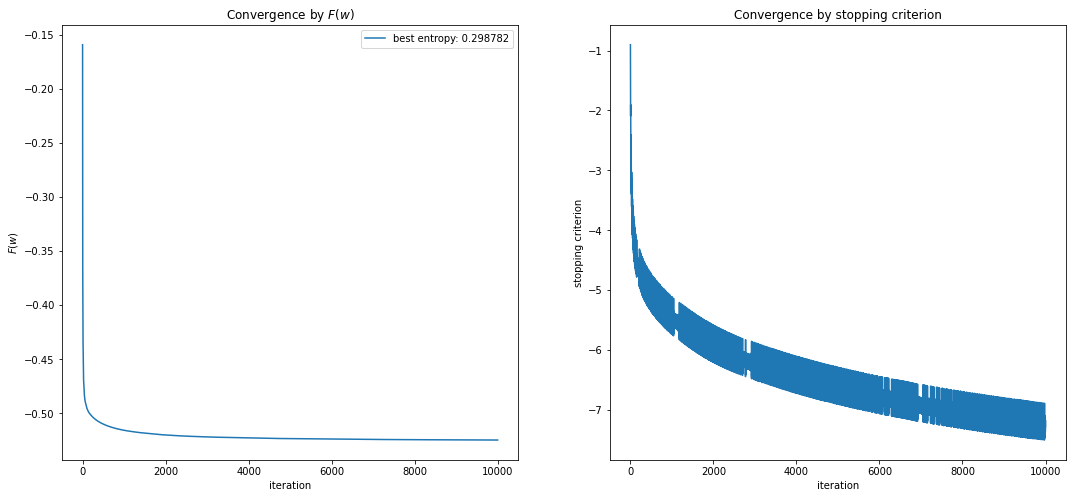

In [3]:
plot_convergence(a1a_log)

Интереснее всего посмотреть на графики в зависимости от $\lambda$, правда результат вполне ожидаемый и соответствует свойствам lasso. Чем больше коэффициент регуляризации, тем больше нулевых параметров в модели и тем быстрее сходится метод (правда, не к самому лучшему значению энтропии, но это и логично, мы ведь ограничиваем пространство возможных параметров + веса зануляются и быстрее выходят по норме разности).

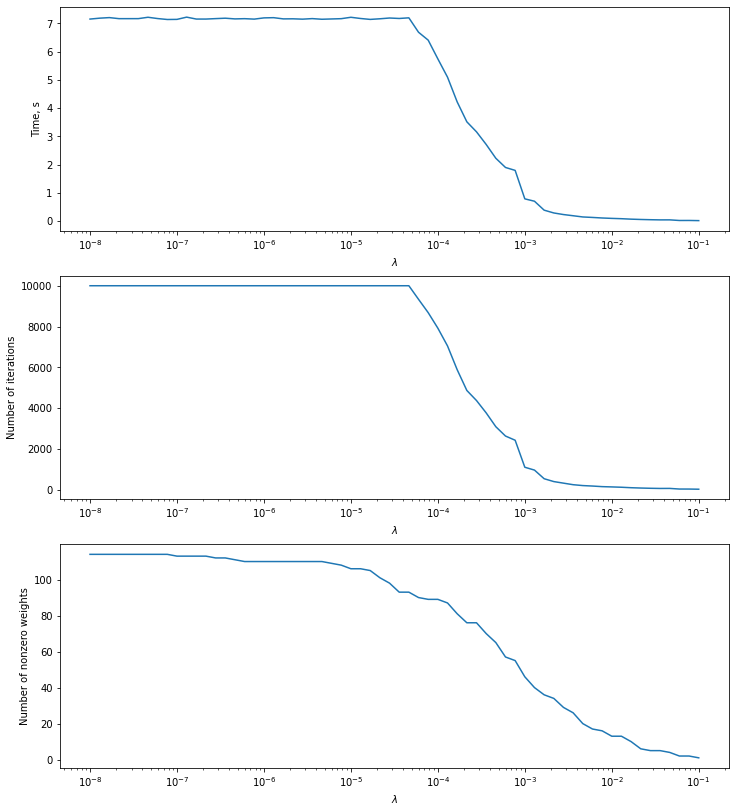

In [4]:
plot_lr(a1a_log)

Можно посмотреть как зануляются веса в зависимости от $\lambda$: чем выше регуляризация, тем более разреженным получается решение. Не все призанки зануляются сразу, так можно было бы определять какую-то метрику важности признака.

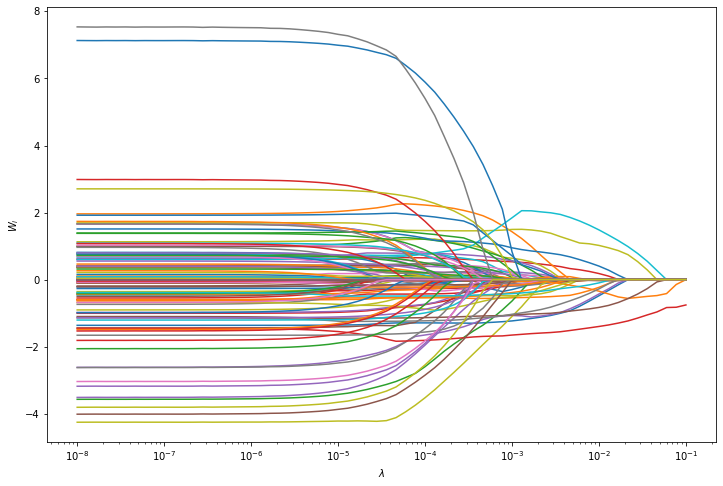

In [5]:
plot_weights(a1a_log)

# Breast Canser

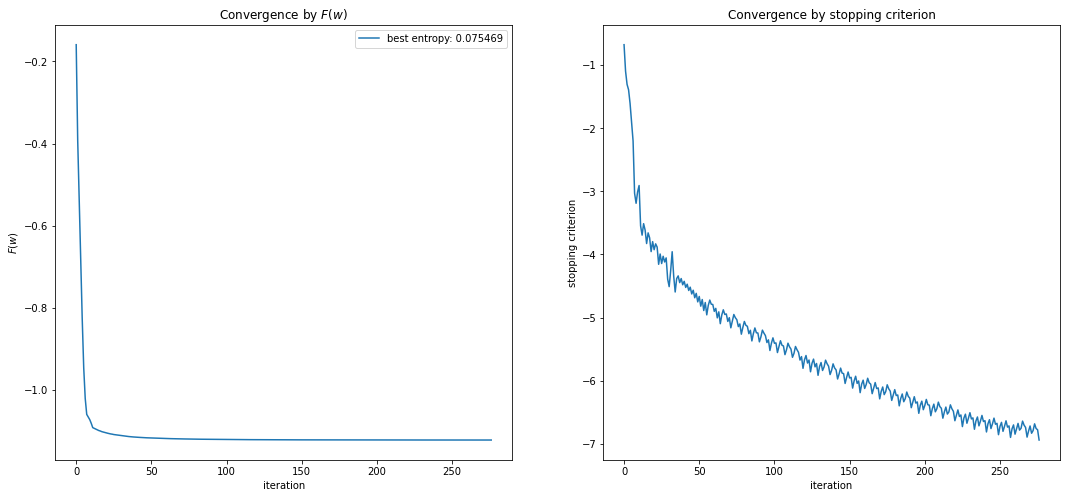

In [6]:
plot_convergence(cancer_log)

Загадкой остается почему при одном параметре регуляризации $\lambda = 0.001$ получаются результаты хуже, чем при любом другом значении.

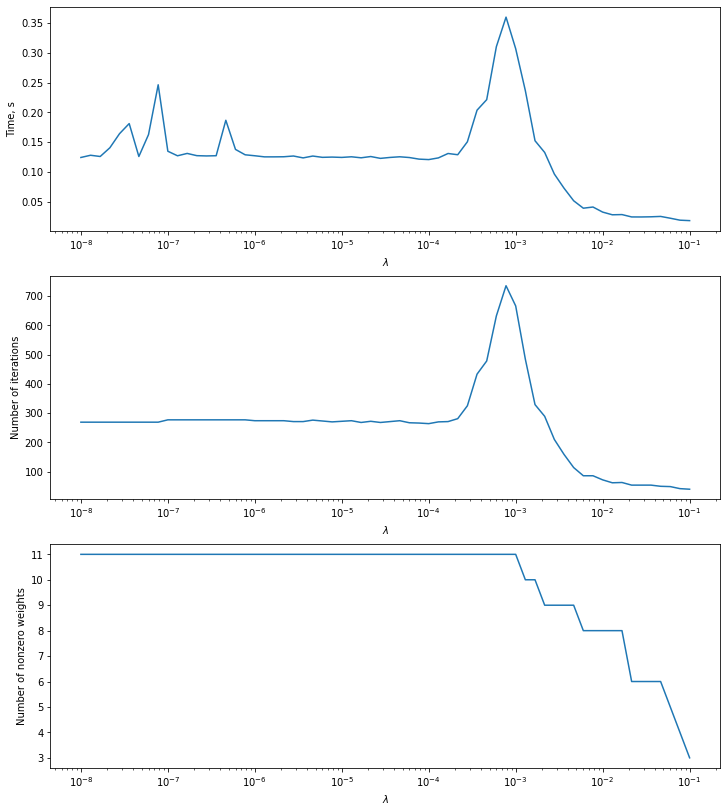

In [7]:
plot_lr(cancer_log)

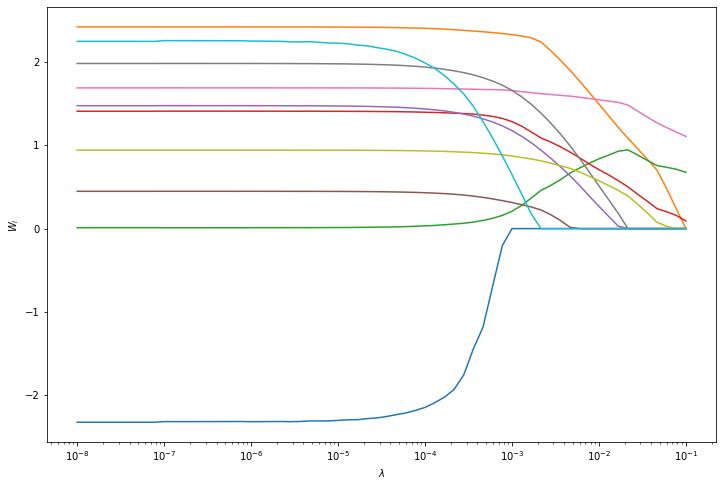

In [11]:
plot_weights(cancer_log)

## Итог

Регуляризация позволяет получить более разреженное решение, зануляя параметры. При отсутствии регуляризации метод ведет себя аналогично градиентному спуску с подбором шага по Нестерову. При бОльшей регуляризации метод сходится быстрее. Мне кажется что (помимо того, что я использую 0 как стартовкую точку весов), это происходит потому что методу нужно сойтись только для малой части весов т.к. остальные почти сразу занулятся. 